In [2]:
import pandas as pd 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt

import scikitplot as skplt

import cleaner as dc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df = pd.read_csv('data/moral_appeal_dataset.csv')
df

,ad,moral_appeal
0,psd jobs spring launch webinar monday pmpm vir...,0
1,the aflcio has always fought alongside workers...,1
2,your national monuments are on the chopping block,0
3,join us for a focus group to share your though...,0
4,with president trump nominating a judge with a...,1
...,...,...
19729,we plan to share a video of our first manufact...,1
19730,chendra is suffering and needs to be sent to a...,1
19731,do not even think about it you better grab one gt,1
19732,not long to wait,1


In [33]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df['ad']= df['ad'].apply(dc.simple_stemmer)

In [24]:
# vectorize testing and training data 
X_train, X_test, y_train, y_test= train_test_split(df['ad'], df['moral_appeal'] , test_size = 0.2, random_state = 0)

In [34]:
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [35]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.813
                  precision    recall  f1-score   support

non moral appeal       0.98      0.63      0.77      1967
    moral appeal       0.73      0.99      0.84      1980

        accuracy                           0.81      3947
       macro avg       0.86      0.81      0.81      3947
    weighted avg       0.86      0.81      0.81      3947

confusion matrix:
[[1246  721]
 [  19 1961]]



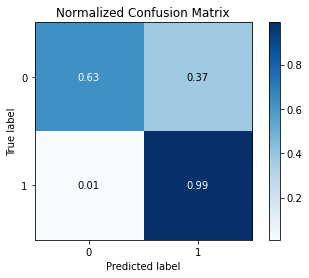

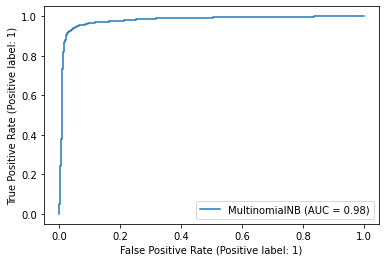

In [36]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['non moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [37]:
df_val = pd.read_csv('data/sample_moral_appeal.csv')
df_val

,ad,moral_appeal
0,yearold danylo is not only battling cancer but...,1
1,learn how to use the new staffing law to impro...,0
2,we are live with climate activist anuna de wev...,0
3,did you miss the t summit relive the daylong e...,0
4,friday is north carolinas online voter registr...,0
...,...,...
123,if you are a developer who wants to make a dif...,0
124,this is how strongly i felt about this i am no...,0
125,are you interested in environmental crime\nfor...,0
126,on the feb ukrainians woke up to the sound of...,1


In [38]:
# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

# Remove stopwords 
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

# Remove special characters 
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

# Stemming the text 
df_val['ad']= df_val['ad'].apply(dc.simple_stemmer)

accuracy:   0.633
                  precision    recall  f1-score   support

non moral appeal       1.00      0.13      0.23        54
    moral appeal       0.61      1.00      0.76        74

        accuracy                           0.63       128
       macro avg       0.81      0.56      0.49       128
    weighted avg       0.78      0.63      0.54       128

confusion matrix:
[[ 7 47]
 [ 0 74]]



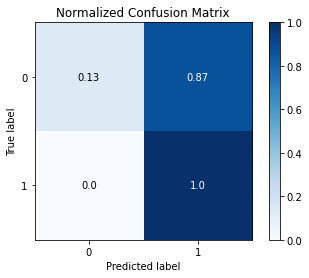

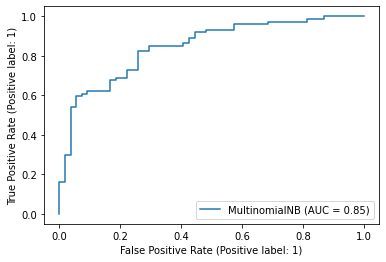

In [39]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['moral_appeal']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'non moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)

df_val['predictions'] = y_pred